In [13]:
import datamol as dm
import pandas as pd
from rdkit import Chem
import plotly.express as px

def get_mol(conformers):
    return conformers.GetConformer(0).GetOwningMol()

def conformer_energies(conformers):
    all_props = [conf.GetPropsAsDict() for conf in conformers.GetConformers()]
    return pd.DataFrame(all_props)

def write_conformers(filename, conformers):
    """Writes all conformers to an sdf file with name filename."""
    c0 = conformers.GetConformer(0)
    m0 = c0.GetOwningMol()
    all_props = [conf.GetPropsAsDict() for conf in conformers.GetConformers()]
    energy_keys = [x for x in all_props[0].keys() if 'delta' not in x]
    energy_key = energy_keys[0]
    with Chem.SDWriter(filename+".sdf") as w:
        for i in range(m0.GetNumConformers()):
            m0.SetProp('ID', f'conf_{i}')
            m0.SetProp('E_kcal', f"{all_props[i][energy_key]:.3f}")
            w.write(m0, confId=i)
    
    print(f"Wrote {m0.GetNumConformers()} conformers to {filename}.sdf")
    return m0


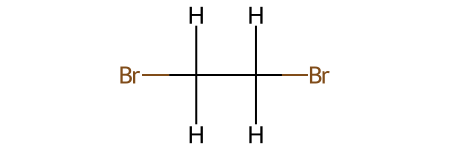

In [14]:
mol = dm.to_mol('BrCCBr', add_hs=True)
mol

In [15]:
mol_conformers = dm.conformers.generate(mol, forcefield="MMFF94s",
                                        minimize_energy=True,
                                        align_conformers=True,
                                        add_hs=False,
                                        energy_iterations=500
                                       ) 

Wrote 50 conformers to BrCCBr.sdf


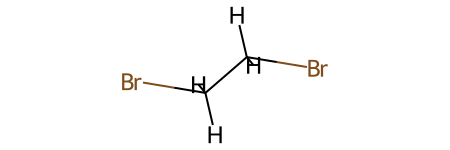

In [16]:
write_conformers('BrCCBr', mol_conformers)

In [17]:
df = conformer_energies(mol_conformers)
df[::5] # Just print every 5th row

,rdkit_MMFF94s_energy,rdkit_MMFF94s_delta_energy
0,3.495023,0.000000e+00
5,3.495023,1.967368e-10
10,3.495023,1.145828e-09
15,3.495023,2.198020e-08
20,4.266749,7.717257e-01
25,4.266749,7.717257e-01
30,4.266749,7.717257e-01
35,4.266749,7.717257e-01
40,4.266749,7.717257e-01
45,4.266749,7.717257e-01


In [20]:
dm.viz.conformers(mol_conformers, remove_hs=False, conf_id=0)

NGLWidget()

In [22]:
dm.viz.conformers(mol_conformers, remove_hs=False, conf_id=45)

NGLWidget()

We can see that the anti arranagement of the Br (conf_id=0) has a higher energy (by about 0.75 kcal/mol), according to the molecular mechanics theory MMFF94s (a Merck model).

# Problem

Compute conformers for the molecule